In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('D:\\Study\\Data-Science\\Machine Learning\\Practice\\CampusX\\Feature Engineering\\Datasets\\Social_Network_Ads.csv')

In [111]:
df=df.iloc[:,2:]

In [112]:
df.sample(10)

,Age,EstimatedSalary,Purchased
237,37,80000,0
307,47,113000,1
18,46,28000,1
367,46,88000,1
194,28,89000,0
190,24,84000,0
318,45,32000,1
41,33,51000,0
262,55,125000,1
385,56,60000,1


In [113]:
X = df.iloc[:,:2]
y = df['Purchased']

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Scaling with StandardScaler

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [119]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [120]:
# Before scaling
X_train.describe().round(2)

,Age,EstimatedSalary
count,280.00,280.00
mean,37.86,69807.14
std,10.22,34641.20
min,18.00,15000.00
25%,30.00,43000.00
50%,37.00,70500.00
75%,46.00,88000.00
max,60.00,150000.00


In [121]:
# After scaling
X_train_scaled.describe().round(2)

,Age,EstimatedSalary
count,280.00,280.00
mean,0.00,0.00
std,1.00,1.00
min,-1.95,-1.58
25%,-0.77,-0.78
50%,-0.08,0.02
75%,0.80,0.53
max,2.17,2.32


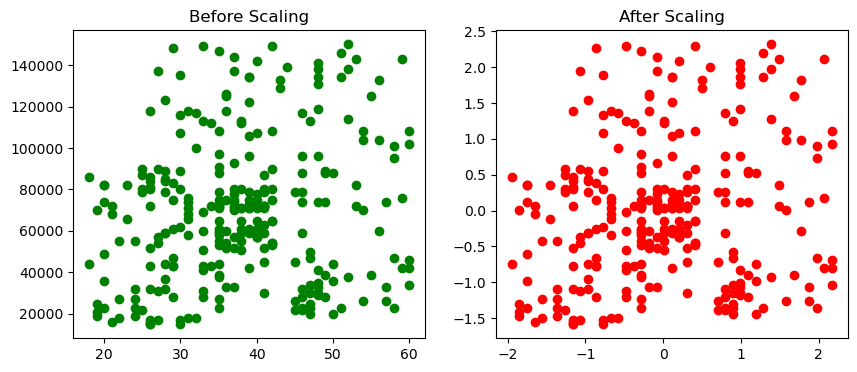

In [122]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(X_train['Age'],X_train['EstimatedSalary'],color='green')
plt.title('Before Scaling')

plt.subplot(1,2,2)
plt.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
plt.title('After Scaling')

plt.show()

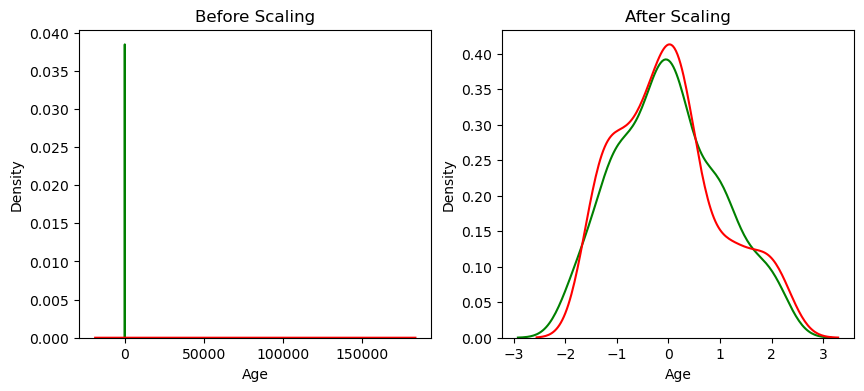

In [123]:
fig, axes = plt.subplots(1,2,figsize=(10,4))

sns.kdeplot(X_train['Age'],color='green',ax=axes[0])
sns.kdeplot(X_train['EstimatedSalary'],color='red',ax=axes[0])
axes[0].set_title('Before Scaling')


sns.kdeplot(X_train_scaled['Age'],color='green',ax=axes[1])
sns.kdeplot(X_train_scaled['EstimatedSalary'],color='red',ax=axes[1])
axes[1].set_title('After Scaling')

plt.show()

Text(0.5, 1.0, 'Age After Scaling')

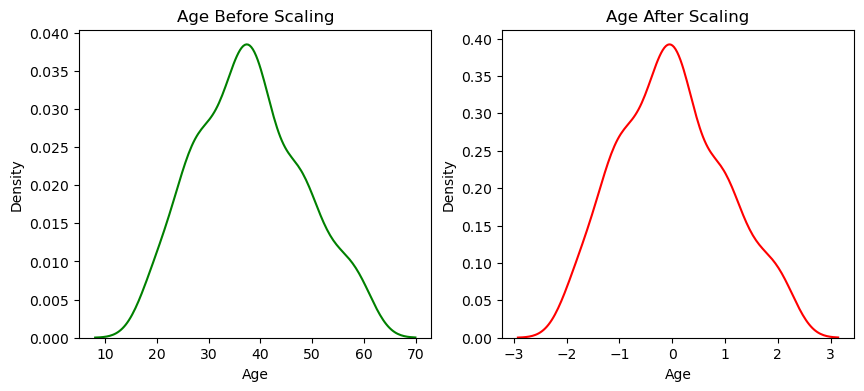

In [124]:
fig, axes = plt.subplots(1,2,figsize=(10,4))

# Before
sns.kdeplot(X_train['Age'],color='green',ax=axes[0])
axes[0].set_title('Age Before Scaling')
# After
sns.kdeplot(X_train_scaled['Age'],color='red',ax=axes[1])
axes[1].set_title('Age After Scaling')

Text(0.5, 1.0, 'EstimatedSalary After Scaling')

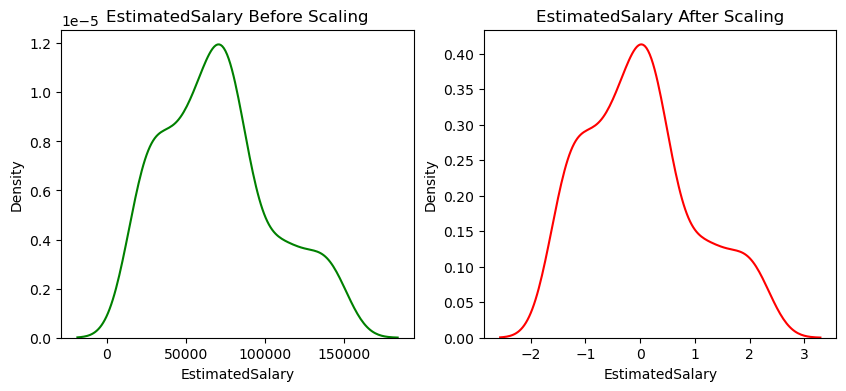

In [125]:
fig, axes = plt.subplots(1,2,figsize=(10,4))

# Before
sns.kdeplot(X_train['EstimatedSalary'],color='green',ax=axes[0])
axes[0].set_title('EstimatedSalary Before Scaling')
# After
sns.kdeplot(X_train_scaled['EstimatedSalary'],color='red',ax=axes[1])
axes[1].set_title('EstimatedSalary After Scaling')

### Checking importance of Scaling in Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
model1 = LogisticRegression()

In [128]:
# without scaling
model1.fit(X_train,y_train)

LogisticRegression()

In [129]:
y_pred = model1.predict(X_test)

In [130]:
# Accuracy with X_test data
from sklearn.metrics import accuracy_score

In [131]:
print('Without Scaling accuracy: ',round(accuracy_score(y_test,y_pred),2))

Without Scaling accuracy:  0.66


In [132]:
model2 = LogisticRegression()

In [133]:
model2.fit(X_train_scaled,y_train)

LogisticRegression()

In [134]:
y_pred = model2.predict(X_test_scaled)

In [135]:
print('With Scaling accuracy: ',round(accuracy_score(y_test,y_pred),2))

With Scaling accuracy:  0.87


##### We can see after scaling accuracy increased in Logistic Regression algorithm!

### Checking importance of Scaling in Decision Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier

In [137]:
clf1 = DecisionTreeClassifier()

In [138]:
# without scaling
clf1.fit(X_train,y_train)

DecisionTreeClassifier()

In [139]:
y_pred = clf1.predict(X_test_scaled)

In [140]:
print('Without Scaling accuracy for Decision Tree: ',round(accuracy_score(y_test,y_pred),2))

Without Scaling accuracy for Decision Tree:  0.66


In [141]:
# with scaling
clf2 = DecisionTreeClassifier()

In [142]:
clf2.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [143]:
y_pred = clf1.predict(X_test_scaled)

In [144]:
print('With Scaling accuracy for Decision Tree: ',round(accuracy_score(y_test,y_pred),2))

With Scaling accuracy for Decision Tree:  0.66


##### For decision tree, Scaling doesn't make any impact. So Not all the algorithms will perform better after scaling. So use of scaling either do better job or don't  do anything